<a href="https://colab.research.google.com/github/Cann-Emma/R/blob/main/R_Demo_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRE-POWER ANALYSIS

In [48]:
pwr.anova.test(k= 3, n= NULL, f= .14, power = .80)
# to get a large effect size(R2= .14) and 80% power, I need 165 participants per each group. Having three groups, N= 495


     Balanced one-way analysis of variance power calculation 

              k = 3
              n = 164.8579
              f = 0.14
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group


# LOADING PACKAGES AND DATASET

In [16]:
print(R.version.string)

[1] "R version 4.3.1 (2023-06-16)"


In [ ]:
print(installed.packages())
install.packages('dplyr')
install.packages('psych')
install.packages('car')
install.packages('pwr')
install.packages('ggplot2')

In [50]:
library(dplyr)
library(psych)
library(car)
library(emmeans)
library(pwr)
library(ggplot2)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




In [ ]:
install.packages('emmeans')

In [44]:
Analysis= read.csv('Exp_2_Analysis_Data.csv')

# DATA SUMMARY

In [45]:
# What is the mean for each group?
round(mean(Analysis$Long.Mask.Time...5.Second..Group), 2)
round(mean(Analysis$Medium.Mask.Time...3.Second..Group), 2)
round(mean(Analysis$Short.Mask.Time...1.Second..Group), 2)

[1] 19.61

[1] 15.98

[1] 11.92

In [46]:
describe(Analysis)
# The three means seem to vary.

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Short.Mask.Time...1.Second..Group,1,264,11.91868,6.094232,10.4278,11.06732,4.449876,3.0070,48.7378,45.7308,2.0037375,6.4299011,0.3750741
Medium.Mask.Time...3.Second..Group,2,264,15.97856,7.206691,14.3839,15.19544,6.603352,4.8070,45.7216,40.9146,1.1390673,1.6538749,0.4435412
Long.Mask.Time...5.Second..Group,3,264,19.60788,8.762287,18.2209,18.80879,8.627694,4.3324,50.8850,46.5526,0.8379457,0.6340245,0.5392815


# DATA VISUALIZATION

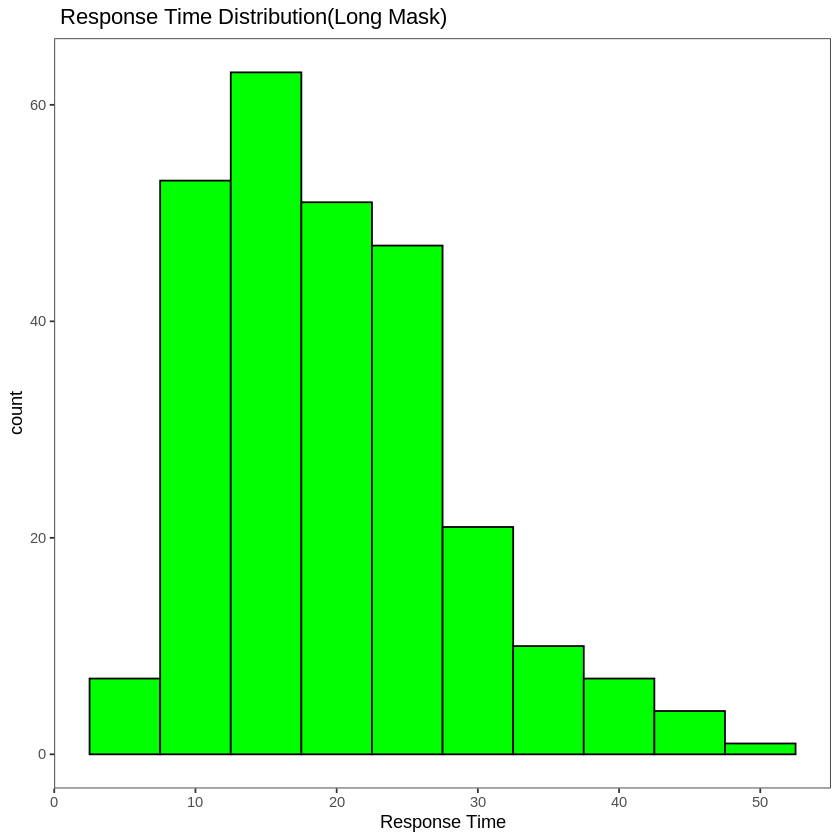

In [59]:
ggplot(Analysis)+geom_histogram(aes(x= Long.Mask.Time...5.Second..Group), colour= 'black', fill= 'green', binwidth= 5)+ggtitle(' Response Time Distribution(Long Mask)')+xlab('Response Time')+ theme_bw()+theme(panel.grid= element_blank())

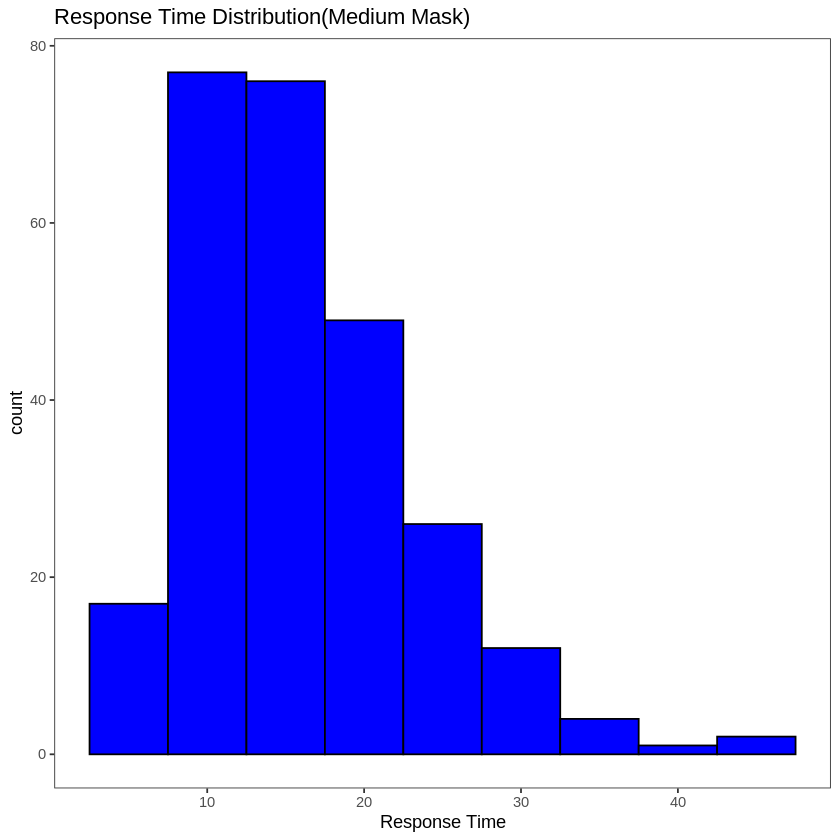

In [58]:
ggplot(Analysis)+geom_histogram(aes(x= Medium.Mask.Time...3.Second..Group), colour= 'black', fill= 'blue', binwidth= 5)+ggtitle('Response Time Distribution(Medium Mask)')+xlab('Response Time')+theme_bw()+theme(panel.grid= element_blank())

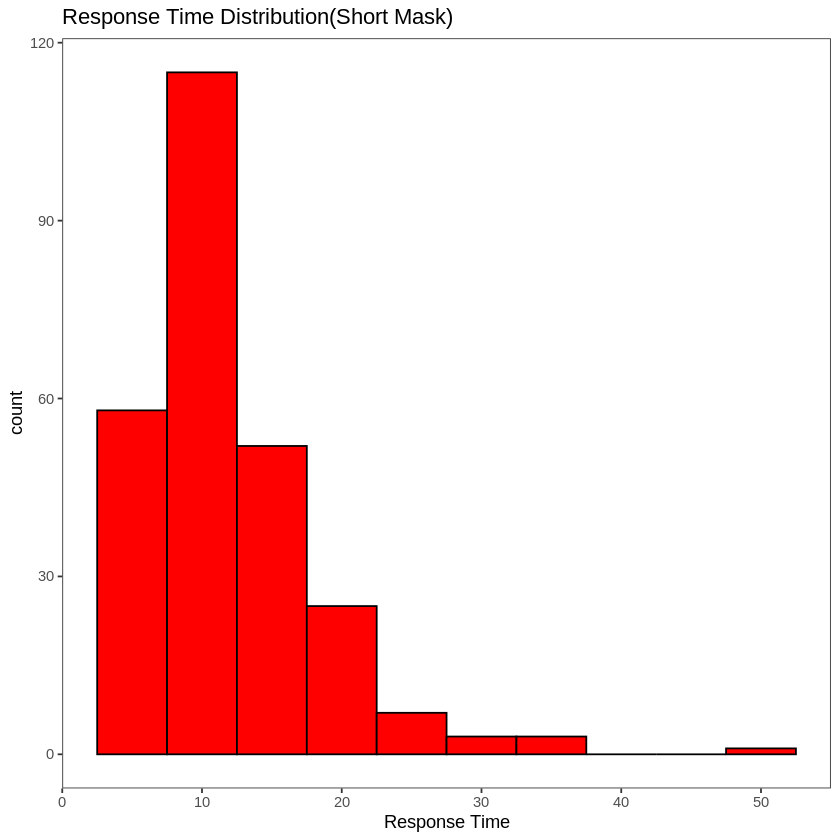

In [57]:
ggplot(Analysis)+geom_histogram(aes(x= Short.Mask.Time...1.Second..Group), colour= 'black', fill= 'red', binwidth= 5)+ggtitle('Response Time Distribution(Short Mask)')+xlab('Response Time')+theme_bw()+theme(panel.grid= element_blank())

#STATISTICAL ASSUMPTION TEST

In [62]:
# Shapiro Wilk Test for Normality
shapiro.test(Analysis$Long.Mask.Time...5.Second..Group)
shapiro.test(Analysis$Medium.Mask.Time...3.Second..Group)
shapiro.test(Analysis$Short.Mask.Time...1.Second..Group)

#The results support the graphs. Seeing ad the p-values are significant for the Shapiro Wil Test, the three groups are not normally distributed


	Shapiro-Wilk normality test

data:  Analysis$Long.Mask.Time...5.Second..Group
W = 0.95176, p-value = 1.159e-07



	Shapiro-Wilk normality test

data:  Analysis$Medium.Mask.Time...3.Second..Group
W = 0.92392, p-value = 2.267e-10



	Shapiro-Wilk normality test

data:  Analysis$Short.Mask.Time...1.Second..Group
W = 0.8449, p-value = 1.438e-15
